<a href="https://colab.research.google.com/github/memolee/Churn-Modelling---ETL---XGBoost/blob/main/Churn_Modelling_%7C_Telecom_operator_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
data = files.upload()

Saving deloitte_dataset.csv to deloitte_dataset (6).csv


In [ ]:
df = pd.read_csv("deloitte_dataset.csv",sep=';')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes


In [ ]:
 df.isnull().sum()

customerID            0
gender              102
SeniorCitizen        91
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           1
StreamingTV           1
StreamingMovies       1
Contract            109
PaperlessBilling      1
PaymentMethod         1
MonthlyCharges        1
TotalCharges          1
Churn                 1
dtype: int64

In [ ]:
# The number of rows and columns
df.shape

(5172, 21)

In [ ]:
#To get an idea of the numeric values, use .describe()
df.describe()

,SeniorCitizen,tenure
count,5081.000000,5172.000000
mean,0.160401,35.023009
std,0.367014,45.584127
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,56.000000
max,1.000000,720.000000


In [ ]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5172 non-null   object 
 1   gender            5070 non-null   object 
 2   SeniorCitizen     5081 non-null   float64
 3   Partner           5172 non-null   object 
 4   Dependents        5172 non-null   object 
 5   tenure            5172 non-null   int64  
 6   PhoneService      5172 non-null   object 
 7   MultipleLines     5172 non-null   object 
 8   InternetService   5172 non-null   object 
 9   OnlineSecurity    5172 non-null   object 
 10  OnlineBackup      5172 non-null   object 
 11  DeviceProtection  5172 non-null   object 
 12  TechSupport       5171 non-null   object 
 13  StreamingTV       5171 non-null   object 
 14  StreamingMovies   5171 non-null   object 
 15  Contract          5063 non-null   object 
 16  PaperlessBilling  5171 non-null   object 


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges       object
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# df.SeniorCitizen = df.SeniorCitizen.astype("int64",errors="ignore")

In [ ]:
cols_to_change = ["TotalCharges"]

for col in cols_to_change:
  df[col] = df[col].str.replace(',','.')

# df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x.str.replace(',','.'))


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85",29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56,95",1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85",108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3",1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7",151.65,Yes


In [ ]:
# Converting Total Charges to a numerical data type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype("float")

df.isnull().sum()

customerID            0
gender              102
SeniorCitizen        91
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           1
StreamingTV           1
StreamingMovies       1
Contract            109
PaperlessBilling      1
PaymentMethod         1
MonthlyCharges        1
TotalCharges          9
Churn                 1
dtype: int64

In [ ]:
cols_to_change = ["MonthlyCharges"]

for col in cols_to_change:
  df[col] = df[col].str.replace(',','.')

In [ ]:
# Converting Total Charges to a numerical data type.
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges'] = df['MonthlyCharges'].astype("float")

df.isnull().sum()

customerID            0
gender              102
SeniorCitizen        91
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           1
StreamingTV           1
StreamingMovies       1
Contract            109
PaperlessBilling      1
PaymentMethod         1
MonthlyCharges        1
TotalCharges          9
Churn                 1
dtype: int64

In [ ]:
df[np.isnan(df['TotalCharges'])]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0.0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0.0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0.0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0.0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,NaN,0.0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0.0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0.0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5171,3566-VVORZ,Female,0.0,Yes,No,12,Yes,No,DSL,No,No,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Drop rows Total charges is NaN & tenure 0 
df = df.drop(df[df['tenure'] == 0 ].index)


In [ ]:
df.shape

(5164, 21)

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.isna().any()

customerID          False
gender               True
SeniorCitizen        True
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges       True
TotalCharges         True
Churn                True
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 0 to 5171
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5164 non-null   object 
 1   gender            5063 non-null   object 
 2   SeniorCitizen     5073 non-null   float64
 3   Partner           5164 non-null   object 
 4   Dependents        5164 non-null   object 
 5   tenure            5164 non-null   int64  
 6   PhoneService      5164 non-null   object 
 7   MultipleLines     5164 non-null   object 
 8   InternetService   5164 non-null   object 
 9   OnlineSecurity    5164 non-null   object 
 10  OnlineBackup      5164 non-null   object 
 11  DeviceProtection  5164 non-null   object 
 12  TechSupport       5163 non-null   object 
 13  StreamingTV       5163 non-null   object 
 14  StreamingMovies   5163 non-null   object 
 15  Contract          5055 non-null   object 
 16  PaperlessBilling  5163 non-null   object 


In [ ]:
df.isnull().sum()

customerID            0
gender              101
SeniorCitizen        91
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           1
StreamingTV           1
StreamingMovies       1
Contract            109
PaperlessBilling      1
PaymentMethod         1
MonthlyCharges        1
TotalCharges          1
Churn                 1
dtype: int64

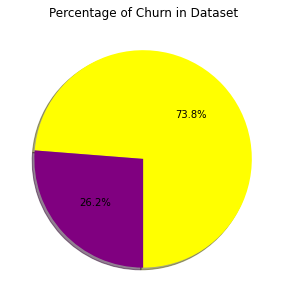

In [ ]:
# Data to plot
sizes = df['Churn'].value_counts(sort = True)
colors = ["yellow","purple"] 
plt.figure(figsize=[5,5])
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [ ]:
#Unique values in each categorical variable:
df["PaymentMethod"].unique()


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Bank transfer', nan], dtype=object)

In [ ]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year', nan], dtype=object)

#Visualization before imputing (With missing values)

In [ ]:
import matplotlib.ticker as mtick

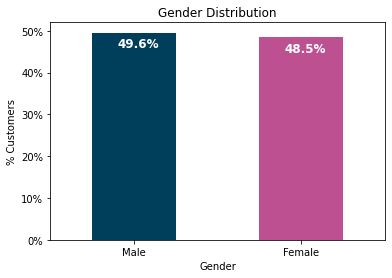

In [ ]:
colors = ['#003f5c','#bc5090']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Text(0.5, 1.0, '% of Senior Citizens')

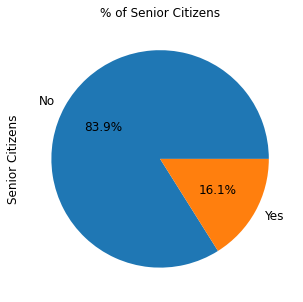

In [ ]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

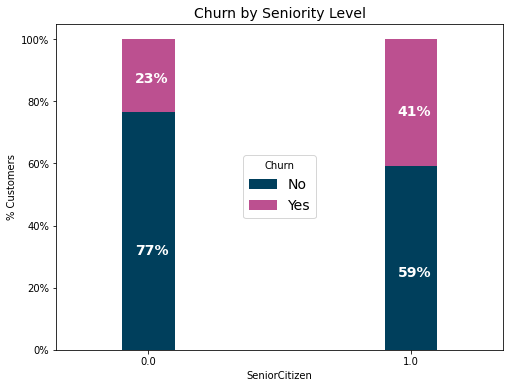

In [ ]:
colors = ['#003f5c','#bc5090']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

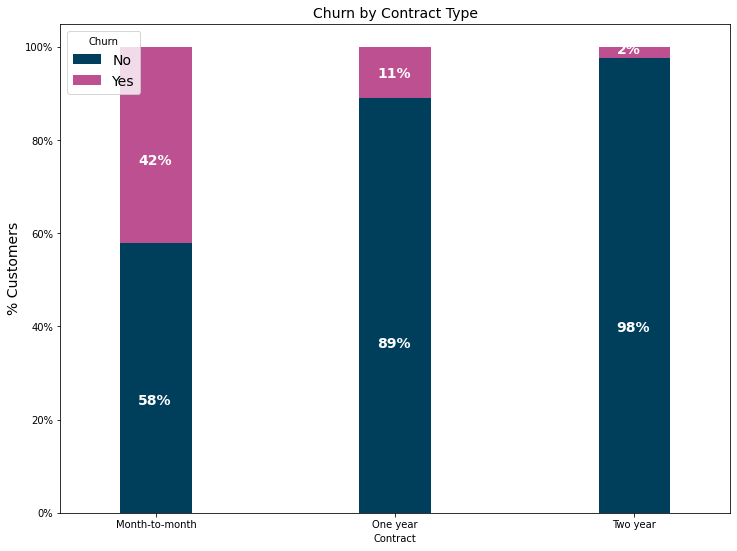

In [ ]:
colors = ['#003f5c','#bc5090']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (12,9),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


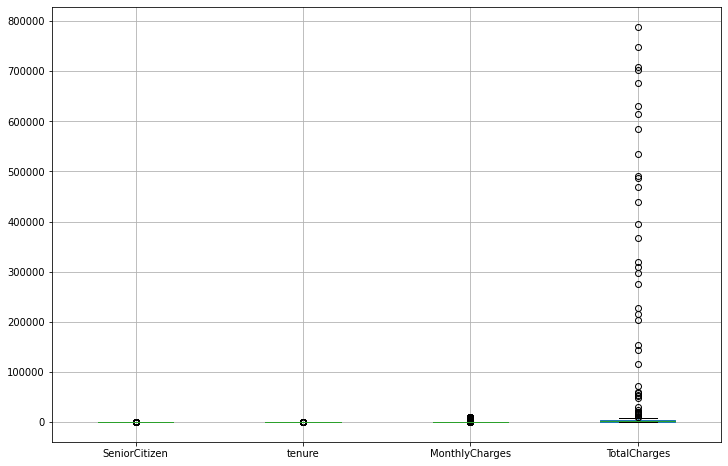

In [ ]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.show()

In [ ]:
df2 = df.drop(['customerID'], axis = 1)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#Define a function to determine outlier boundaries
def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75, 25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  LL = Q1 - 1.5*IQR
  return UL, LL

In [ ]:
#Apply the function to your data
for column in df2.columns:
  if df2[column].dtype != 'object':
    UL, LL = outlier_limits(df2[column])
    df2[column] = np.where((df2[column] > UL) | (df2[column] < LL), np.nan, df2[column]) 

In [ ]:
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No Phone Service,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_N,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,0.0,34.0,56.95,1889.50,0.0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,0.0,2.0,53.85,108.15,1.0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,0.0,45.0,42.30,1840.75,0.0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
4,0.0,2.0,70.70,151.65,1.0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No Phone Service,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_N,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,0.0,34.0,56.95,1889.50,0.0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,0.0,2.0,53.85,108.15,1.0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,0.0,45.0,42.30,1840.75,0.0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
4,0.0,2.0,70.70,151.65,1.0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
# df_knn = df_dummies.copy()

In [ ]:
df_dummies.dtypes

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No Phone Service               uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
#Copy the datafrme for subsequent treatment.
df_mice = df_dummies.copy()

In [ ]:
df_mice.dtypes

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No Phone Service               uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
!pip install fancyimpute

In [ ]:
#Call the library for Imputation Algorithms
from fancyimpute import KNN, IterativeImputer

In [ ]:
#Instantiate KNN
# knn = KNN()

In [ ]:
# df_knn.iloc[:, :] = knn.fit_transform(df_knn)

In [ ]:
#No missing value after KNN imputation
# df_knn.info()

In [ ]:
# plt.figure(figsize=(12,8))
# df_knn.boxplot()
# plt.show()

In [ ]:
#Instantiate MICE imputer
mice = IterativeImputer(random_state=102)

In [ ]:
#Transform the data using mice imputer
df_mice.iloc[:, :] = mice.fit_transform(df_mice)

In [ ]:
#No missing value after mice imputation
df_mice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 0 to 5171
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5164 non-null   float64
 1   tenure                                   5164 non-null   float64
 2   MonthlyCharges                           5164 non-null   float64
 3   TotalCharges                             5164 non-null   float64
 4   Churn                                    5164 non-null   float64
 5   gender_Female                            5164 non-null   float64
 6   gender_Male                              5164 non-null   float64
 7   Partner_No                               5164 non-null   float64
 8   Partner_Yes                              5164 non-null   float64
 9   Dependents_No                            5164 non-null   float64
 10  Dependents_Yes                           5164 no

In [ ]:
# cols = df_mice.columns.difference(["MonthlyCharges","TotalCharges"])
# df_mice[cols] = df_mice[cols].astype(int)

In [ ]:
df_mice.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No Phone Service,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_N,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


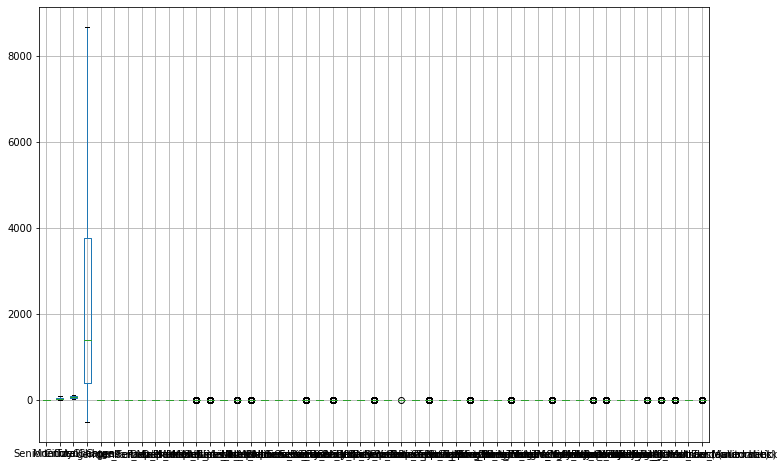

In [ ]:
plt.figure(figsize=(12,8))
df_mice.boxplot()
plt.show()

##After you have explored the dateset, now it is time to move on to the cleaning the dataset

In [ ]:
df_mice.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No Phone Service             0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [ ]:
df_mice.dtypes

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                      float64
gender_Female                              float64
gender_Male                                float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No Phone Service             float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No             

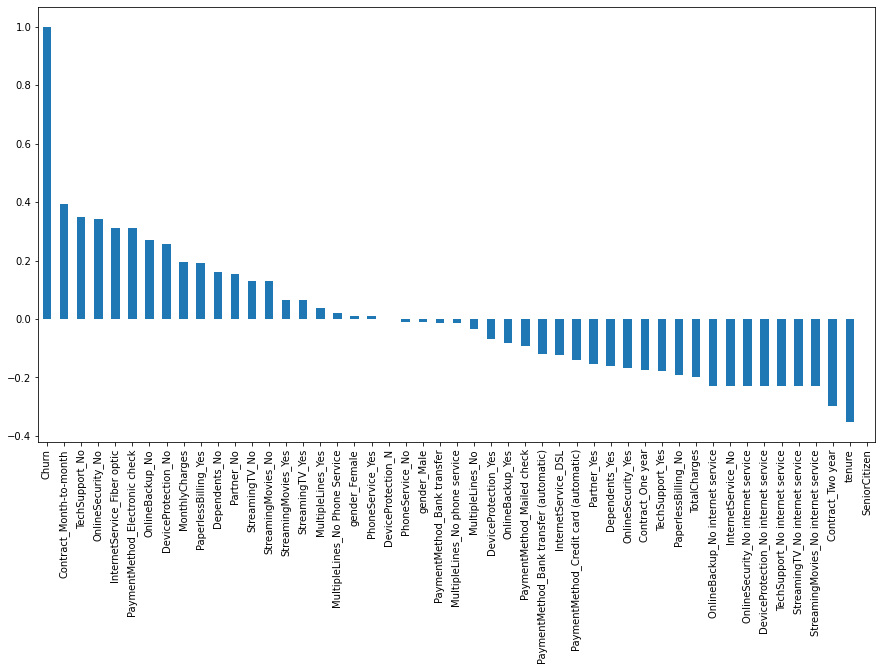

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_mice.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_mice['Churn'].values
X = df_mice.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)


ValueError: ignored

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

##SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)
# print(classification_report(y_test, preds))


In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)
# print(classification_report(y_test, preds))


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)
# print(classification_report(y_test, preds))


#Model Evaluation

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
results = pd.DataFrame([['XGBoost',
acc, prec, rec, f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print (results)

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
accuracies = cross_val_score(estimator = classifier,
 X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: 
%0.2f (+/- %0.2f)"  % (accuracies.mean(), 
accuracies.std() * 2)))